# 第５章：係受け解析
ファイルai.ja.zipに収められている人工知能に関するテキストを係受け解析して,結果をai.ja.txt.parsedに保存せよ

まずはファイルのダウンロードをwgetコマンドを使ってnotebookに直接ダウンロードする.
wgetコマンド実行時に -nc オプションをつけることで既にダウンロードされている場合は重複ダウンロードを回避してくれる.

In [6]:
!wget -nc https://nlp100.github.io/data/ai.ja.zip

--2020-12-11 13:53:08--  https://nlp100.github.io/data/ai.ja.zip
nlp100.github.io (nlp100.github.io) をDNSに問いあわせています... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
nlp100.github.io (nlp100.github.io)|185.199.110.153|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 17516 (17K) [application/zip]
`ai.ja.zip' に保存中

ai.ja.zip           100%[===================>]  17.11K  --.-KB/s 時間 0.001s     

2020-12-11 13:53:08 (13.6 MB/s) - `ai.ja.zip' へ保存完了 [17516/17516]



wgetコマンドによるzipファイルのダウンロードができたので,続いてunzipコマンドを使ってファイルを解凍する

In [7]:
!unzip ai.ja.zip

Archive:  ai.ja.zip
  inflating: ai.ja.txt               
  inflating: readme.ai.ja.md         


In [9]:
!head -n5 ai.ja.txt

人工知能

人工知能（じんこうちのう、、AI〈エーアイ〉）とは、「『計算（）』という概念と『コンピュータ（）』という道具を用いて『知能』を研究する計算機科学（）の一分野」を指す語。「言語の理解や推論、問題解決などの知的行動を人間に代わってコンピューターに行わせる技術」、または、「計算機（コンピュータ）による知的な情報処理システムの設計や実現に関する研究分野」ともされる。

『日本大百科全書(ニッポニカ)』の解説で、情報工学者・通信工学者の佐藤理史は次のように述べている。


ただし,このままではテキストファイルが文区切りになっていないので,文区切りのファイルを作成し,これを対象に係受け解析する.

In [1]:
with open('ai.ja.txt') as fi, open('ai.ja.txt.splited', 'w') as output_fi:
    for line in fi:
        output_fi.write(line.replace('。', '。\n'))

----
使用するファイルの準備ができたので,続いてCaboChaをインストールする.CaboChaを使うには依存ライブラリであるCRF++もインストールする必要があるっぽい.
> ### CRFとは
CRF(Conditional Random Field)は系列ラベリング(各単語に品詞を割り当てる的な問題)を解くためのもの.系列ラベリングは分類問題として解くことができるので,各々の品詞への割り当て確率を計算することで解ける.これは**「識別モデル」** を使うことで確率を算出できる.CRFではこの確率算出の時に,与えた入力文に適した品詞を割り当てられるように入力全体での整合性を取ろうとする.この整合性のために「構造学習」を行うのがCRFの特徴

In [1]:
# 実際にCaboChaを使ってみる
!echo "太郎は花子が読んでいる本を次郎に渡した" | cabocha

    太郎は---------D
      花子が-D     |
    読んでいる-D   |
            本を---D
            次郎に-D
              渡した
EOS


In [3]:
# cabochaコマンドはオプションに -f1 を渡すと計算機に処理しやすいフォーマットで出力してくれる
!echo "太郎は花子が読んでいる本を次郎に渡した" | cabocha -f1

* 0 5D 0/1 -0.742128
太郎	名詞,固有名詞,人名,名,*,*,太郎,タロウ,タロー
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 1 2D 0/1 1.700175
花子	名詞,固有名詞,人名,名,*,*,花子,ハナコ,ハナコ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
* 2 3D 0/2 1.825021
読ん	動詞,自立,*,*,五段・マ行,連用タ接続,読む,ヨン,ヨン
で	助詞,接続助詞,*,*,*,*,で,デ,デ
いる	動詞,非自立,*,*,一段,基本形,いる,イル,イル
* 3 5D 0/1 -0.742128
本	名詞,一般,*,*,*,*,本,ホン,ホン
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
* 4 5D 1/2 -0.742128
次	名詞,一般,*,*,*,*,次,ツギ,ツギ
郎	名詞,一般,*,*,*,*,郎,ロウ,ロー
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
* 5 -1D 0/1 0.000000
渡し	動詞,自立,*,*,五段・サ行,連用形,渡す,ワタシ,ワタシ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
EOS


In [37]:
# ai.ja.txtのファイルをCaboChaで係受け解析する
!cat ai.ja.txt.splited| cabocha -f1 > ai.ja.txt.parsed

In [38]:
!head ai.ja.txt.parsed

* 0 -1D 1/1 0.000000
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
EOS
EOS
* 0 17D 1/1 -1.776924
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
* 1 17D 2/3 -1.776924
（	記号,括弧開,*,*,*,*,（,（,（


## 40. 係り受け解析結果の読み込み（形態素）
> 形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ

In [2]:
class Morph:
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1
        
    # __repr__:特殊メソッド.jupyter notebookなどではprintを使わず、変数名を指定するだけで出力結果を得ようとするときに呼び出される
    # 関数repr():オブジェクト情報を返してくれる.ただの文字列なのかそうでないのか表面上わかりづらい時などに便利.(主にデバック用...?)
    def __repr__(self):
        return f"Morph(surface={repr(self.surface)}, base={repr(self.base)}, pos={repr(self.pos)}, pos1={repr(self.pos1)})" 

In [3]:
# Morphクラス使用例
m = Morph("サーフェス", "ベース", "ポス", "ポスいち")
m

Morph(surface='サーフェス', base='ベース', pos='ポス', pos1='ポスいち')

上の出力を見ると特にprintなどを使っていないのにもかかわらずmの情報がプリントされている <- `__repr__` のおかげ

In [64]:
# 冒頭の説明文だけを取り出して係受け解析し,別のファイルとして保存
!head -n5 ai.ja.txt.splited | cabocha -f1 > ai.ja.txt.parsed.head
!cat ai.ja.txt.parsed.head

* 0 -1D 1/1 0.000000
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
EOS
EOS
* 0 17D 1/1 -1.776924
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
* 1 17D 2/3 -1.776924
（	記号,括弧開,*,*,*,*,（,（,（
じん	名詞,一般,*,*,*,*,じん,ジン,ジン
こうち	名詞,一般,*,*,*,*,こうち,コウチ,コーチ
のう	助詞,終助詞,*,*,*,*,のう,ノウ,ノー
、	記号,読点,*,*,*,*,、,、,、
、	記号,読点,*,*,*,*,、,、,、
* 2 3D 0/0 0.758984
AI	名詞,一般,*,*,*,*,*
* 3 17D 1/5 -1.776924
〈	記号,括弧開,*,*,*,*,〈,〈,〈
エーアイ	名詞,固有名詞,一般,*,*,*,*
〉	記号,括弧閉,*,*,*,*,〉,〉,〉
）	記号,括弧閉,*,*,*,*,）,）,）
と	助詞,格助詞,引用,*,*,*,と,ト,ト
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
、	記号,読点,*,*,*,*,、,、,、
* 4 5D 2/2 1.035972
「	記号,括弧開,*,*,*,*,「,「,「
『	記号,括弧開,*,*,*,*,『,『,『
計算	名詞,サ変接続,*,*,*,*,計算,ケイサン,ケイサン
* 5 9D 0/3 1.243687
（	記号,括弧開,*,*,*,*,（,（,（
）	記号,括弧閉,*,*,*,*,）,）,）
』	記号,括弧閉,*,*,*,*,』,』,』
という	助詞,格助詞,連語,*,*,*,という,トイウ,トユウ
* 6 9D 0/1 0.691934
概念	名詞,一般,*,*,*,*,概念,ガイネン,ガイネン
と	助詞,並立助詞,*,*,*,*,と,ト,ト
* 7 8D 1/1 1.048596
『	記号,括弧開,*,*,*,*,『,『,『
コンピュータ	名詞,一般,*,*,*,*,コンピュータ,コンピュータ,コンピュータ
* 8 9D 0/3 1.540775
（	記号,括弧開,*,*,*,*,（,（,（
）	記号,括弧閉,*,*,*,*,

### CaboChaによる係受け解析結果について
出力フォーマットは以下の通り
> (1行目)* 文節番号 係り先の文節番号(係り先なし:-1) 主辞の形態素番号/機能語の形態素番号 係り関係のスコア(大きい方が係りやすい)

> (2行目)表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,原形,読み,発音

In [4]:
from pprint import pprint
from itertools import islice

# テキスト1行分を受け取って各形態素を辞書形式にして返す変数
# 第４章でやった形態素の各要素を取得する方法と同じ
def parse_morph_line(line):
    p = line.find('\t')   # タブ文字のインデックス番号を返す
    assert p != -1, 'The line does not contain a TAB character.'
    contents = line[p+1:].split(',')
    assert len(contents) >= 7, f'The line sholud have more than 7 contents separated by comma.line={line}'
    # m = Morph
    return {'surface':line[:p], 'base':contents[6], 'pos':contents[0], 'pos1':contents[1]}

# 入力テキスト(cabocha解析結果)に対して目的の出力(Morphオブジェクトのリスト)を得るための関数
def cabocha_reader(text):
    morphs = []
    for line in text:
        line = line.rstrip('\n')
        if line == 'EOS' and morphs:   # EOSを見つける&morphsが空じゃない = 1行分解析完了
            yield morphs
            morphs = []   # リセット
        elif '\t' in line:
            morph = parse_morph_line(line)
            morphs.append(Morph(morph['surface'], morph['base'], morph['pos'], morph['pos1']))
            
with open('ai.ja.txt.parsed.head') as f:
    morph = list(cabocha_reader(f))
    
print(len(morph))
pprint(morph[1])

3
[Morph(surface='人工', base='人工', pos='名詞', pos1='一般'),
 Morph(surface='知能', base='知能', pos='名詞', pos1='一般'),
 Morph(surface='（', base='（', pos='記号', pos1='括弧開'),
 Morph(surface='じん', base='じん', pos='名詞', pos1='一般'),
 Morph(surface='こうち', base='こうち', pos='名詞', pos1='一般'),
 Morph(surface='のう', base='のう', pos='助詞', pos1='終助詞'),
 Morph(surface='、', base='、', pos='記号', pos1='読点'),
 Morph(surface='、', base='、', pos='記号', pos1='読点'),
 Morph(surface='AI', base='*', pos='名詞', pos1='一般'),
 Morph(surface='〈', base='〈', pos='記号', pos1='括弧開'),
 Morph(surface='エーアイ', base='*', pos='名詞', pos1='固有名詞'),
 Morph(surface='〉', base='〉', pos='記号', pos1='括弧閉'),
 Morph(surface='）', base='）', pos='記号', pos1='括弧閉'),
 Morph(surface='と', base='と', pos='助詞', pos1='格助詞'),
 Morph(surface='は', base='は', pos='助詞', pos1='係助詞'),
 Morph(surface='、', base='、', pos='記号', pos1='読点'),
 Morph(surface='「', base='「', pos='記号', pos1='括弧開'),
 Morph(surface='『', base='『', pos='記号', pos1='括弧開'),
 Morph(surface='計算', base='計算', pos

## 41. 係り受け解析結果の読み込み（文節・係り受け）
>40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ

In [5]:
!head -n10 ai.ja.txt.parsed.head

* 0 -1D 1/1 0.000000
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
EOS
EOS
* 0 17D 1/1 -1.776924
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
* 1 17D 2/3 -1.776924
（	記号,括弧開,*,*,*,*,（,（,（


In [6]:
from collections import defaultdict
class Chunk:
    def __init__(self, morphs, dst, srcs):
        self.morphs = morphs
        self.dst = dst
        self.srcs = srcs
        
    def __repr__(self):
        return f"Chunk(morphs={repr(self.morphs)}, dst={repr(self.dst)}, srcs={repr(self.srcs)})"

# 再掲
# (1行目)* 文節番号 係り先の文節番号(係り先なし:-1) 主辞の形態素番号/機能語の形態素番号 係り関係のスコア(大きい方が係りやすい)

def parse_chunk_line(line):
    p = line.find('*')
    assert p != -1, 'The line should contain * mark in it'
    contents = line[p+2:].split(' ')
    assert len(contents) >= 4, f'The line should have 4 contents in it.{line}'
    return {'index':contents[0], 'dst':contents[1], 'srcs':contents[2]}
    
def chunk_reader(text):
    dsts = defaultdict(int)   # 係先を格納
    srcs = defaultdict(list)   # 係元を格納
    morphs = defaultdict(list)   # 各形態素を格納
    
    for line in text:
        line = line.rstrip('\n')
        if line == 'EOS' and morphs:
            yield [Chunk(morphs[index], dsts[index], srcs[index]) for index in range(len(dsts))]
            # 諸々のリセット
            dsts = defaultdict(int)
            srcs = defaultdict(list)
            morphs = defaultdict(list)

        elif line.startswith('*'):
            parsed = parse_chunk_line(line)
            dst = int(parsed['dst'].rstrip('D'))   # 係先の文節番号
            index = int(parsed['index'])   # 自身の文節番号
            dsts[index] = dst   # 文節番号nの文節の係先をわかるようにしておく
            if dst == -1:   # 係先がない場合
                dsts[index] = -1
            else:   # 係元のindex番号をリストに追加
                srcs[dst].append(index)
                
        elif '\t' in line:
            morph = parse_morph_line(line)
            morphs[index].append(Morph(morph['surface'], morph['base'], morph['pos'], morph['pos1']))
            
with open('ai.ja.txt.parsed.head') as f:
    chunk = list(chunk_reader(f))
    
pprint(chunk[1])

[Chunk(morphs=[Morph(surface='人工', base='人工', pos='名詞', pos1='一般'), Morph(surface='知能', base='知能', pos='名詞', pos1='一般')], dst=17, srcs=[]),
 Chunk(morphs=[Morph(surface='（', base='（', pos='記号', pos1='括弧開'), Morph(surface='じん', base='じん', pos='名詞', pos1='一般'), Morph(surface='こうち', base='こうち', pos='名詞', pos1='一般'), Morph(surface='のう', base='のう', pos='助詞', pos1='終助詞'), Morph(surface='、', base='、', pos='記号', pos1='読点'), Morph(surface='、', base='、', pos='記号', pos1='読点')], dst=17, srcs=[]),
 Chunk(morphs=[Morph(surface='AI', base='*', pos='名詞', pos1='一般')], dst=3, srcs=[]),
 Chunk(morphs=[Morph(surface='〈', base='〈', pos='記号', pos1='括弧開'), Morph(surface='エーアイ', base='*', pos='名詞', pos1='固有名詞'), Morph(surface='〉', base='〉', pos='記号', pos1='括弧閉'), Morph(surface='）', base='）', pos='記号', pos1='括弧閉'), Morph(surface='と', base='と', pos='助詞', pos1='格助詞'), Morph(surface='は', base='は', pos='助詞', pos1='係助詞'), Morph(surface='、', base='、', pos='記号', pos1='読点')], dst=17, srcs=[2]),
 Chunk(morphs=[Morph(su

## 42. 係り元と係り先の文節の表示
>係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ

In [8]:
# 記号以外の形態素の表層形を取得し,それらをまとめて出力する
def show_clause(morphs: list):
    return [print(morph.surface, sep='', end='') for morph in morphs if morph.pos != '記号']

with open('ai.ja.txt.parsed.head') as f:
    chunks_list = list(chunk_reader(f))
    
    # 各EOS毎に処理を繰り返す
    for chunks in chunks_list:  # 1文 in テキスト全体
        for chunk in chunks:   # 1文節 in 1文
            # 係元の文節を出力
            show_clause(chunk.morphs)
            
            # 係先の文節を出力
            if chunk.dst == -1:
                print(' -> '+'係先なし')
            else:
                print(' -> ', end='')
                show_clause(chunks[chunk.dst].morphs)
                print('')
        print('\n'+'EOS'+'\n')

人工知能 -> 係先なし

EOS

人工知能 -> 語
じんこうちのう -> 語
AI -> エーアイとは
エーアイとは -> 語
計算 -> という
という -> 道具を
概念と -> 道具を
コンピュータ -> という
という -> 道具を
道具を -> 用いて
用いて -> 研究する
知能を -> 研究する
研究する -> 計算機科学
計算機科学 -> の
の -> 一分野を
一分野を -> 指す
指す -> 語
語 -> 係先なし

EOS

言語の -> 推論
理解や -> 推論
推論 -> 問題解決などの
問題解決などの -> 知的行動を
知的行動を -> 代わって
人間に -> 代わって
代わって -> 行わせる
コンピューターに -> 行わせる
行わせる -> 技術または
技術または -> 研究分野とも
計算機 -> コンピュータによる
コンピュータによる -> 情報処理システムの
知的な -> 情報処理システムの
情報処理システムの -> 実現に関する
設計や -> 実現に関する
実現に関する -> 研究分野とも
研究分野とも -> される
される -> 係先なし

EOS



## 43. 名詞を含む文節が動詞を含む文節に係るものを抽出
>名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ

In [5]:
with open('ai.ja.txt.parsed.head') as f:
    chunks_list = list(chunk_reader(f))
    
    # 各EOS毎に処理を繰り返す
    for chunks in chunks_list:
        for chunk in chunks:
            # 係元の文節に名詞が含まれているかどうかチェック
            if any([morph for morph in chunk.morphs if morph.pos == '名詞']):
                # 係先の文節に動詞が含まれているどうかチェック
                if any([morph for morph in chunks[chunk.dst].morphs if morph.pos == '動詞']):
                    show_clause(chunk.morphs)
                    print(' -> ', end='')
                    show_clause(chunks[chunk.dst].morphs)
                    print('')

        print('\n'+'EOS'+'\n')


EOS

道具を -> 用いて
知能を -> 研究する
一分野を -> 指す

EOS

知的行動を -> 代わって
人間に -> 代わって
コンピューターに -> 行わせる
研究分野とも -> される

EOS



## 44. 係り受け木の可視化Permalink
>与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，Graphviz等を用いるとよい

### Graphvizの使い方
基本的な流れは以下の通り.
1. グラフオブジェクトの生成
> 無向グラフを描くGraphモジュールと有向グラフを描くDigraphモジュールをインポート.  
`dg = Digraph(format='png')`みたいにしてオブジェクト生成.引数に指定したフォーマット形式で保存できる.
2. ノードやエッジを追加
> オブジェクトにメソッドでnodeやedgeを追加していく.  
`dg.node('1'), dg.edge('1', '2')`とか
3. (必要があれば)保存, 描画
> `dg.view()`で画像ファイル出力.単に`dg`とすればnotebook上で出力.`dg.render(file_path)`とするとパス指定して画像保存できる.

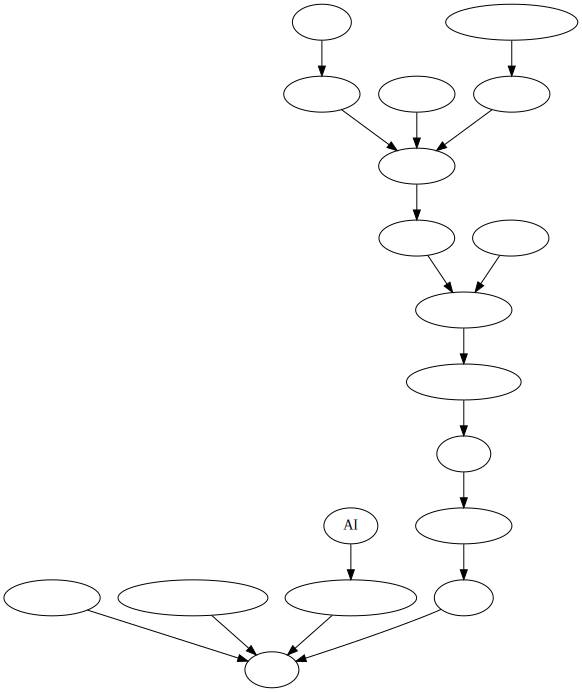

In [20]:
# 有向グラフをimport
from graphviz import Digraph

# 文節の文字列を返す関数
def get_clause(morphs: list) -> str:
    return ''.join([morph.surface for morph in morphs if morph.pos != '記号'])



with open('ai.ja.txt.parsed.head') as f:
    chunks_list = list(chunk_reader(f))
    
    # 各EOS毎に処理を繰り返す
    for sen_num, chunks in enumerate(chunks_list):
        if sen_num == 1:
            # 有向グラフオブジェクトを生成
            dg = Digraph(format='png')
            for i, chunk in enumerate(chunks):
                # 係元の文節のノード作成
                dg.node(str(i), label=get_clause(chunk.morphs))
            
                # 係先の文節のノード, 辺を作成
                if chunk.dst != -1:
                    to = chunk.dst
                    dg.node(str(chunk.dst), label=get_clause(chunks[chunk.dst].morphs))
                    dg.edge(str(i), str(to))

dg

## 45. 動詞の格パターンの抽出
>今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ.  
- 動詞を含む文節において，最左の動詞の基本形を述語とする
- 述語に係る助詞を格とする
- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる  
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． 
この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである
`作り出す　で　は　を`  
このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．
- コーパス中で頻出する述語と格パターンの組み合わせ
- 「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [7]:
def josi_pos_extracter(chunks: list, src_num: int) -> str:
    for morph in chunks[src_num].morphs:
        if morph.pos == '助詞':
            return morph.base

def verb_pos_extracter(cabocha_parsed_file: str) -> list:
    with open(cabocha_parsed_file) as f:
        chunks_list = list(chunk_reader(f))
    
        # 各EOS毎に処理を繰り返す
        for chunks in chunks_list:   # for 行 in テキスト全体:
            
            for chunk in chunks:   # for 文節 in 1行:
                
                # 現在見ている文節に動詞が含まれているかどうかチェック
                if(any([morph for morph in chunk.morphs if morph.pos == '動詞'])):
                    # 文節中の最左の動詞
                    first_verb = [morph.base for morph in chunk.morphs if morph.pos == '動詞'][0]
                
                    # この動詞に係る助詞を格納するリスト
                    pos_list = [josi_pos_extracter(chunks, src_num) for src_num in chunk.srcs]
                    while None in pos_list:
                        pos_list.remove(None)
                    pos_list = sorted(pos_list)
                    
                    # ファイルに出力しやすい形式にするために,リストの先頭に係先の動詞を挿入
                    pos_list.insert(0, first_verb)
                    yield pos_list

In [8]:
# 例文の処理結果と一致するか確認. John.txt.parsedファイルに係受け解析済み例文が格納されている. 
pprint(list(verb_pos_extracter('John.txt.parsed')))

[['作り出す', 'で', 'は', 'を']]


In [9]:
with open('verb_pos_extract.txt', 'w') as f:
    verb_pos_list = list(verb_pos_extracter('ai.ja.txt.parsed'))
    for verb_pos in verb_pos_list:
        print('\t'.join(verb_pos), file=f)

In [10]:
!head verb_pos_extract.txt

用いる	を
する	て	を
指す	を
代わる	に	を
行う	て	に
する	と
述べる	で	の	は
する	で	を
する	を
する	を


- コーパス中で頻出する述語と格パターンの組み合わせ の確認  

`uniq -c ファイル名`
（指定したファイル内の重複行を取り除き、それぞれの行が何回出現したかを表示する）   

`sort -r ファイル名`
（指定したファイルの各行を逆順でソート.数値でソートしたいときは`n`つける.`-nr`とか.）  

`sort -k キーの列番号 ファイル名`  
（指定したファイルの各行を指定のキー番号の値でソート）

In [76]:
!sort -k 1 verb_pos_extract.txt | uniq -c | sort -nr | head

  51 する	を
  18 する	が
  16 する	に
  16 する	と
  11 する	に	を
  10 する	は	を
   9 する	で	を
   9 する	が	に
   9 よる	に
   8 行う	を


- 「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）  

`grep -e '探索対象1' -e '探索対象2' ... ファイル名`（指定したファイルないにおいて探索条件に書いたものを探す）

In [12]:
!grep -e '^行う' -e '^なる' -e '^与える' verb_pos_extract.txt | sort -k 1 | uniq -c | sort -r | head

   8 行う	を
   4 なる	に	は
   3 なる	が	と
   2 行う	は	を
   2 なる	に
   1 与える	が	など
   1 与える	に	は	を
   1 与える	が	に
   1 なる	から	が	て	で	と	ば
   1 なる	から	で	と


## 46. 動詞の格フレーム情報の抽出
>45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ.  
- 項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
- 述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる  
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．  
`作り出す	で は を	会議で ジョンマッカーシーは 用語を`

In [8]:
def verb_pos_extracter_46(cabocha_parsed_file: str) -> list:
    with open(cabocha_parsed_file) as f:
        chunks_list = list(chunk_reader(f))
    
        # 各EOS毎に処理を繰り返す
        for chunks in chunks_list:   # for 行 in テキスト全体:
            
            for chunk in chunks:   # for 文節 in 1行:
                
                # 現在見ている文節に動詞が含まれているかどうかチェック
                if(any([morph for morph in chunk.morphs if morph.pos == '動詞'])):
                    # 文節中の最左の動詞
                    first_verb = [morph.base for morph in chunk.morphs if morph.pos == '動詞'][-1]
                
                    # この動詞に係る助詞を格納するリスト
                    pos_list = []
                    # この動詞に係る文節を格納するリスト
                    clause_list = []
                    
                    for src_num in chunk.srcs:
                        pos_list.append(josi_pos_extracter(chunks, src_num))
                        clause_list.append(get_clause(chunks[src_num].morphs))
                    while None in pos_list:
                        pos_list.remove(None)
                    
                    # zipを使って二つの配列を同時ソートする
                    if not pos_list:
                        break
                    c = zip(pos_list, clause_list)
                    c = sorted(c)
                    pos_list, clause_list = zip(*c)
                    
                    # tupleで返ってきているので,リストに直す
                    pos_list = list(pos_list)
                    clause_list = list(clause_list)
                    
                    # 配列を連結
                    pos_list.extend(clause_list)
                    
                    # ファイルに出力しやすい形式にするために,リストの先頭に係先の動詞を挿入
                    pos_list.insert(0, first_verb)
                    yield pos_list

In [11]:
# 例文の処理結果と一致するか確認. John.txt.parsedファイルに係受け解析済み例文が格納されている. 
pprint(list(verb_pos_extracter_46('John.txt.parsed')))

[['作り出す', 'で', 'は', 'を', '会議で', 'ジョンマッカーシーは', '用語を']]


In [12]:
# 出力の確認
for verb_pos in list(verb_pos_extracter_46('ai.ja.txt.parsed'))[:20]:
    print('\t'.join(verb_pos))

用いる	を	道具を
する	て	を	用いて	知能を
指す	を	一分野を
代わる	に	を	人間に	知的行動を
せる	て	に	代わって	コンピューターに
れる	と	研究分野とも
いる	で	の	は	解説で	次のように	佐藤理史は
する	で	を	コンピュータ上で	知的能力を
する	を	推論判断を
する	を	画像データを
する	て	を	解析して	パターンを
ある	が	は	画像認識等が	応用例は
れる	で	に	により	ダートマス会議で	1956年に	ジョンマッカーシーにより
用いる	を	記号処理を
する	と	を	主体と	記述を
いる	で	でも	現在では	意味あいでも
れる	も	思考ルーチンも
ある	も	ことも
する	を	カウンセラーを
れる	が	に	プログラム	人工無脳が


## 47. 機能動詞構文のマイニング
>動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．  
- 「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
- 述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
- 述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）  
例えば「また、自らの経験を元に学習を行う強化学習という手法もある。」という文から，以下の出力が得られるはずである．  
`学習を行う	に を	元に 経験を`

In [77]:
# 文節に助詞「を」 and サ変接続名詞の両方があるかどうか
def sahen_wo_sarcher(chunks: list, src_num: int) -> str:
    if len(chunks[src_num].morphs) == 2:
        m1, m2 = chunks[src_num].morphs
        if m1.pos == '名詞' and m1.pos1 == 'サ変接続' and m2.surface == 'を' and m2.pos == '助詞':
            return chunks[src_num]
            
        
def verb_pos_extracter_47(cabocha_parsed_file: str) -> list:
    with open(cabocha_parsed_file) as f:
        chunks_list = list(chunk_reader(f))
    
        # 各EOS毎に処理を繰り返す
        for chunks in chunks_list:   # for 行 in テキスト全体:
            
            for chunk in chunks:   # for 文節 in 1行:
                
                # 現在見ている文節に動詞が含まれているかどうかチェック
                if(any([morph for morph in chunk.morphs if morph.pos == '動詞'])):
                    # 文節中の最左の動詞
                    first_verb = [morph.base for morph in chunk.morphs if morph.pos == '動詞'][0]
                
                    # この動詞に係る助詞を格納するリスト
                    pos_list = []
                    # この動詞に係る文節を格納するリスト
                    clause_list = []
                    
                    # 文節に助詞「を」 and サ変接続名詞のペアがいくつあるかカウント
                    sahen_wo_count = len([sahen_wo_sarcher(chunks, src_num) for src_num in chunk.srcs])
                    
                    # 動詞の係もとにサ変名詞 & 「を」があるかどうかを判定
                    c = 1
                    for src_num in chunk.srcs:
                        # 最右のサ変名詞でなければスキップ
                        if c != sahen_wo_count:
                            c += 1
                            continue
                        if sahen_wo_sarcher(chunks, src_num):
                            sahen_chunk = sahen_wo_sarcher(chunks, src_num)
                            pos_list = [josi_pos_extracter(chunks, src_num) for src_num in chunk.srcs]
                            clause_list = [get_clause(chunks[src_num].morphs) for src_num in chunk.srcs if chunks[src_num] != sahen_chunk]
                            
                            while None in pos_list:
                                pos_list.remove(None)
                     
                            pos_list.remove('を')
                            
                            if not pos_list:
                                break
                                
                            # zipを使って二つの配列を同時ソートする
                            c = zip(pos_list, clause_list)
                            c = sorted(c)
                            pos_list, clause_list = zip(*c)
                    
                            # アンパックするとtupleで返ってきているので,リストに直す
                            pos_list = list(pos_list)
                            clause_list = list(clause_list)
                            
                    
                            # 配列を連結
                            pos_list.extend(clause_list)
                            
                            # 述語を整形
                            verb_clause = get_clause(sahen_chunk.morphs) + first_verb
                            
                            # ファイルに出力しやすい形式にするために,リストの先頭に述語を挿入
                            pos_list.insert(0, verb_clause)
                            yield pos_list
                            break

In [78]:
# 例題の確認
pprint(list(verb_pos_extracter_47('q47_parsed.txt')))

[['学習を行う', 'に', 'を', '経験を', '元に']]


In [79]:
# 出力の確認
for verb_pos in list(verb_pos_extracter_47('ai.ja.txt.parsed'))[:20]:
    print('\t'.join(verb_pos))

注目を集める	が	その後
学習を行う	に	を	経験を	元に
進化を見せる	て	において	は	敵対的生成ネットワークは	加えて	特に
開発を行う	は	エイダ・ラブレスは
意味をする	に	データに
研究を進める	て	費やして
運転をする	に	増やし
特許をする	が	まで	日本が	2018年までに
運転をする	て	に	基づいて	柔軟に
注目を集める	から	は	ことから	ファジィは
研究を続ける	が	て	ジェフホーキンスが	向けて
注目を集める	に	急速に
投資を行う	で	に	民間企業主導で	全世界的に
探索を行う	で	実装し
研究を行う	は	Googleは
投資をする	は	まで	韓国は	2022年までに
反乱を起こす	て	に対して	於いて	人間に対して
判断を介す	から	観点から
禁止を求める	が	に	ヒューマン・ライツ・ウォッチが	4月には
追及を受ける	て	で	で	と	とともに	暴露されており	公聴会では	整合性で	拒否すると	とともに


## 48. 名詞から根へのパスの抽出
>文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．  
- 各文節は（表層形の）形態素列で表現する
- パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する  
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる  
`ジョンマッカーシーは -> 作り出した  
AIに関する -> 最初の -> 会議で -> 作り出した  
最初の -> 会議で -> 作り出した  
会議で -> 作り出した  
人工知能という -> 用語を -> 作り出した  
用語を -> 作り出した`

In [26]:
def noun_pos_extracter(chunk) -> str:
    for morph in chunk.morphs:
        if morph.pos == '名詞':
            return morph

def noun_to_end(cabocha_parsed_file: str) -> str:
    with open(cabocha_parsed_file) as f:
        chunks_list = list(chunk_reader(f))
        # 各EOS毎に処理を繰り返す
        for chunks in chunks_list:   # for 行 in テキスト全体:
            for chunk in chunks:   # for 文節 in 1行:
                if noun_pos_extracter(chunk):
                    while chunk.dst != -1:
                        print(get_clause(chunk.morphs), ' -> ', end='')
                        chunk = chunks[chunk.dst]
                    if chunk.dst == -1:
                        print(get_clause(chunk.morphs))

In [17]:
noun_to_end('John.txt.parsed')

ジョンマッカーシーは  -> 作り出した
AIに関する  -> 最初の  -> 会議で  -> 作り出した
最初の  -> 会議で  -> 作り出した
会議で  -> 作り出した
人工知能という  -> 用語を  -> 作り出した
用語を  -> 作り出した


## 49. 名詞間の係り受けパスの抽出
>文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がi
とj
（i<j
）のとき，係り受けパスは以下の仕様を満たすものとする．  
- 問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する
- 文節iとjに含まれる名詞句はそれぞれ，XとYに置換する  
また，係り受けパスの形状は，以下の2通りが考えられる．    
- 文節iから構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示
- 上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を” | “で連結して表示  
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる  
`
Xは | Yに関する -> 最初の -> 会議で | 作り出した
Xは | Yの -> 会議で | 作り出した
Xは | Yで | 作り出した
Xは | Yという -> 用語を | 作り出した
Xは | Yを | 作り出した
Xに関する -> Yの
Xに関する -> 最初の -> Yで
Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した
Xに関する -> 最初の -> 会議で | Yを | 作り出した
Xの -> Yで
Xの -> 会議で | Yという -> 用語を | 作り出した
Xの -> 会議で | Yを | 作り出した
Xで | Yという -> 用語を | 作り出した
Xで | Yを | 作り出した
Xという -> Yを`

In [70]:
# 文節を受け取り, その名詞の部分を文字列subで置き換えて出力
def get_sub_clause(morphs: list, sub: str) -> str:
    return sub + ''.join([morph.surface for morph in morphs if morph.pos != '記号' and morph.pos != '名詞'])

# その文節に名詞が含まれるかどうかを判定
def noun_pos_extracter(chunk) -> str:
    for morph in chunk.morphs:
        if morph.pos == '名詞':
            return True
        
# 1行分のchunkと文節iを受け取り, iとペアになるjのリストを返す.
def get_i_j_pairs(chunks: list, src_num: int) -> list:
    assert noun_pos_extracter(chunks[src_num]), 'This chunk does not include noun clause'
    j_s = []
    for index in range(src_num+1, len(chunks)):
        if noun_pos_extracter(chunks[index]):
            j_s.append(chunks[index])
        
    return j_s

# 文節i, jを受け取り,根までのそれぞれのパスにおいて共通している文節のリストを返す
def common_path(chunks: list, chunk_i, chunk_j) -> list:
    i_path = set()
    original_i = chunk_i
    while chunk_i.dst != -1:
        i_path.add(chunk_i)
        chunk_i = chunks[chunk_i.dst]
        
    i_path.remove(original_i)   # i自身は取り出す
        
    j_path = set()
    original_j = chunk_j
    while chunk_j.dst != -1:
        j_path.add(chunk_j)
        chunk_j = chunks[chunk_j.dst]
        
    j_path.remove(original_j)   # j自身は取り出す
    
    common_path = list(i_path & j_path)
    
    return common_path
        

# ある文節から根までへ,幾つの文節を経るかをカウント
def path_length(chunks: list, chunk) -> int:
    length = 0
    while chunk.dst != -1:
        chunk = chunks[chunk.dst]
        length += 1 
        
    return length

In [71]:
def pair_noun_to_end(cabocha_parsed_file: str) -> str:
    with open(cabocha_parsed_file) as f:
        chunks_list = list(chunk_reader(f))
        # 各EOS毎に処理を繰り返す
        for chunks in chunks_list:   # for 行 in テキスト全体:
            
            for index, i_chunk in enumerate(chunks):   # for 文節 in 1行:
                
                if noun_pos_extracter(i_chunk):  # 文節i
                    
                    j_s = get_i_j_pairs(chunks, index)   # ペアとなる文節j
                    
                    for j_chunk in j_s:
                        common_chunks = common_path(chunks, i_chunk, j_chunk)
                        print(f'common_chunksは{common_chunks}')
                        # i->根までの途中にjがある場合(「|」が必要ない)
                        print(f'len(common_chunks) = {len(common_chunks)}, path_length = {path_length(chunks, j_chunk)}')
                        
                        if len(common_chunks) == path_length(chunks, j_chunk):
                            print('i->根までの途中にjがあるパターン\n')
                            path_chunk = i_chunk
                            
                            while path_chunk.dst != -1:
                                if path_chunk == i_chunk:   # 文節iを出力
                                    print(get_sub_clause(i_chunk.morphs, 'X'), ' -> ', end='')
                                    path_chunk = chunks[path_chunk.dst]
                                        
                                elif path_chunk == j_chunk:   # 文節jを出力
                                    print(get_sub_clause(j_chunk.morphs, 'Y'), ' -> ', end='')
                                    path_chunk = chunks[path_chunk.dst]
                                    
                                else:   # それ以外の文節を出力
                                    print(get_clause(path_chunk.morphs), ' -> ', end='')
                                    path_chunk = chunks[path_chunk.dst]
                            if path_chunk.dst == -1:
                                print(get_clause(path_chunk.morphs))
                                print('=========')
                        
                        # i->根までの途中にjがない場合(「|」が必要)
                        else:
                            print('i->根までの途中にjがないパターン\n')
                            path_chunk = i_chunk
                            
                            while path_chunk.dst != -1:
                                if path_chunk == i_chunk:   # 文節iを出力
                                    print(get_sub_clause(i_chunk.morphs, 'X'), ' -> ', end='')
                                    path_chunk = chunks[path_chunk.dst]
                                        
                                elif path_chunk == j_chunk:   # 文節jを出力
                                    print(get_sub_clause(j_chunk.morphs, 'Y'), ' -> ', end='')
                                    path_chunk = chunks[path_chunk.dst]
                                        
                                elif path_chunk in common_chunks:   # 文節kを出力
                                    print('|', ' -> ', end='')
                                    path_chunk = chunks[path_chunk.dst]
                                        
                                else:   # それ以外の文節を出力
                                    print(get_clause(path_chunk.morphs), ' -> ', end='')
                                    path_chunk = chunks[path_chunk.dst]
                                    
                            if path_chunk.dst == -1:
                                print(get_clause(path_chunk.morphs))
                                print('=========')

In [72]:
pair_noun_to_end('John.txt.parsed')

common_chunksは[]
len(common_chunks) = 0, path_length = 3
i->根までの途中にjがないパターン

Xは  -> 作り出した
common_chunksは[]
len(common_chunks) = 0, path_length = 2
i->根までの途中にjがないパターン

Xは  -> 作り出した
common_chunksは[]
len(common_chunks) = 0, path_length = 1
i->根までの途中にjがないパターン

Xは  -> 作り出した
common_chunksは[]
len(common_chunks) = 0, path_length = 2
i->根までの途中にjがないパターン

Xは  -> 作り出した
common_chunksは[]
len(common_chunks) = 0, path_length = 1
i->根までの途中にjがないパターン

Xは  -> 作り出した
common_chunksは[Chunk(morphs=[Morph(surface='会議', base='会議', pos='名詞', pos1='サ変接続'), Morph(surface='で', base='で', pos='助詞', pos1='格助詞')], dst=6, srcs=[2])]
len(common_chunks) = 1, path_length = 2
i->根までの途中にjがないパターン

Xに関する  -> Yの  -> |  -> 作り出した
common_chunksは[]
len(common_chunks) = 0, path_length = 1
i->根までの途中にjがないパターン

Xに関する  -> 最初の  -> Yで  -> 作り出した
common_chunksは[]
len(common_chunks) = 0, path_length = 2
i->根までの途中にjがないパターン

Xに関する  -> 最初の  -> 会議で  -> 作り出した
common_chunksは[]
len(common_chunks) = 0, path_length = 1
i->根までの途中にjがないパターン

Xに関する  -> 最初

## 解き直し編〜Classのメソッドを拡充して解く(47~49)
せっかくクラスを使っているので諸々の関数をメソッドとして用意してみる

In [11]:
class Chunk:
    def __init__(self, morphs, dst, srcs):
        self.morphs = morphs
        self.dst = dst
        self.srcs = srcs
        
    def __repr__(self):
        return f"Chunk(morphs={repr(self.morphs)}, dst={repr(self.dst)}, srcs={repr(self.srcs)})"
    
    # 文節の文全体の文字列を取得
    def get_surface(self) -> str:
        return ''.join(morph.surface for morph in self.morphs if morph.pos != '記号')
    """
    # 文節の指定のposを持つ形態素の表層形を文字列stringに置き換えた文字列を取得
    def get_surface_swap(self, pos, string) -> str:
        tmp_morphs = self.morphs
        for tmp_morph in tmp_morphs:
            if tmp_morph.pos == pos:
                tmp_morph.surface = string
                
        return ''.join(morph.surface for morph in tmp_morphs if morph.pos != '記号')
    """
    # 文節の中に引数のposが含まれているかどうか判定
    def include_pos(self, pos) -> bool:
        return any(morph.pos == pos for morph in self.morphs)
    
    # 文節の中に含まれているpos(1番はじめに見つかったもの=最左)を返す
    def get_pos_left(self, pos):
        for morph in self.morphs:
            if morph.pos == pos:
                return morph
            
    # 文節の中に含まれているpos(1番はじめに見つかったもの=最右)を返す        
    def get_pos_right(self, pos):
        for morph in self.morphs[::-1]:
            if morph.pos == pos:
                return morph
    
    # 文節の中に引数のpos1が含まれているかどうか判定
    def include_pos1(self, pos1) -> bool:
        return any(morph.pos1 == pos1 for morph in self.morphs)
    
    # 文節の中に含まれているpos1(1番はじめに見つかったもの=最左)を返す
    def get_pos1_left(self, pos1):
        for morph in self.morphs:
            if morph.pos1 == pos1:
                return morph
            
    # 文節の中に含まれているpos1(1番はじめに見つかったもの=最右)を返す        
    def get_pos1_right(self, pos1):
        for morph in self.morphs[::-1]:
            if morph.pos1 == pos1:
                return morph
            
    # 文節中に含まれている,指定したposを持つ全てのmorphを返す
    def get_pos_all(self, pos):
        return [morph for morph in self.morphs if morph.pos == pos]


In [12]:
# 47

def re_sahen_wo_getter(cabocha_parsed_file :str):
    with open(cabocha_parsed_file) as f:
        chunk_list = list(chunk_reader(f))
        for chunks in chunk_list:   # 1行 in text
            for chunk in chunks:   # 1文節 in 1行
                
                # ===== 情報取得 =====
                if chunk.include_pos('動詞'):
                    left_verb = chunk.get_pos_left('動詞')   # 最左の動詞を取得
                    src_chunk_list = []
                    sahen_wo = False   # 初期化するならsrc_chunk_listに入っていないような値使うと良い.-1とか
                    for src in chunk.srcs:   # 動詞に係る各文節について
                        src_chunk = chunks[src]
                        if src_chunk.include_pos1('サ変接続') and src_chunk.include_pos('助詞'):
                            if src_chunk.get_pos_right('助詞').base == 'を':# 「サ変接続+を」を含む文節
                                sahen_wo = src_chunk
                        if src_chunk.include_pos('助詞'):   # 「助詞」を含む文節
                            src_chunk_list.append(src_chunk)
                    
                    # ===== 整形 =====
                    # リストから「サ変接続+を」自身を除外 & ソート
                    if not sahen_wo in src_chunk_list:
                        continue
                    src_chunk_list.remove(sahen_wo)
                    src_chunk_list.sort(key=lambda x: x.morphs[-1].base)  # 助詞はmorphsの最後に格納されているものでソート
                    
                    surface_list = [chunk.get_surface() for chunk in src_chunk_list]
                    josi_list = [morph.base for chunk in src_chunk_list for morph in chunk.morphs if morph.pos == '助詞']
                
                    # ===== 出力 =====(「サ変接続+を」がある場合のみ出力
                    if sahen_wo:
                        print(sahen_wo.get_surface(), end = '')
                        print(left_verb.base, end='\t')
                        print(' '.join(josi_list), end = '\t')
                        print(' '.join(surface_list))
                

In [13]:
re_sahen_wo_getter('q47_parsed.txt')

学習を行う	に を	元に 経験を


In [14]:
re_sahen_wo_getter('ai.ja.txt.parsed')

知的行動を代わる	に	人間に
推論判断をする		
記号処理を用いる		
記述をする	と	主体と
注目を集める	が	サポートベクターマシンが
学習を行う	に を	元に 経験を
流行を超える		
学習を繰り返す		
統計的学習をする	で は を に を通して	ACT-Rでは 推論ルールを 元に 生成規則を通して
進化を見せる	は て において	敵対的生成ネットワークは 加えて 生成技術において
コンテンツ生成を行う		
機械式計算機をする	は	ブレーズ・パスカルは
開発を行う	は	エイダ・ラブレスは
プログラミング言語をする	は	彼はまた
テストをする		
来談者中心療法を行う		
プログラミング言語をする	は	アランカルメラウアーは
バックギャモン専用コンピュータTDギャモンをする	に は	1992年に IBMは
投資全額を上回る	が	コストが
意味付けをする	に対して から	非構造化データに対して ここから
処理を行う		
知的処理を行う	により に	ティム・バーナーズリーにより Webに
意味をする	に	データに
知的処理を行う	て に	付加して コンピュータに
研究を進める	て	費やして
命令をする	で	機構で
運転をする	に	元に
特許をする	が まで に	日本が 2018年までに
研究をする		
運転をする	て に	基づいて 柔軟に
注目を集める	から は	ことから ファジィは
ニューロファジィ制御をする		
成功を受ける		
知的制御を用いる	て も	受けて 他社も
開発工数を抑える		
制御をする	から	少なさから
知的制御をする		
表現するをする		
進歩を担う		
精度改善を果たす	が で に	チームが 画像処理コンテストで 2012年に
専用プログラムを使う		
研究を続ける	が て	ジェフホーキンスが 向けて
行動型システムを用いる	は は	ものではなく これは
関連性を導き出す		
ワンショット学習をする	が	データが
認識能力を持つ		
記号接地問題(シンボルグラウンディング問題)をする	に は	8月には
注目を集める	に	急速に
普及を受ける		
機械学習を組み合わせる		
投資を行う	で に	民間企業主導で 全世界的に
探索を行う	で	無報酬で
推論をする	て	経て
共同研究を始める	とも	マックスプランク研究所とも
研究を行う	は	G

In [15]:
# 48

def re_noun_to_end(cabocha_parsed_file: str) -> str:
    with open(cabocha_parsed_file) as f:
        chunks_list = list(chunk_reader(f))
        # 各EOS毎に処理を繰り返す
        for chunks in chunks_list:   # for 行 in テキスト全体:
            for chunk in chunks:   # for 文節 in 1行:
                if chunk.include_pos('名詞'):
                    while chunk.dst != -1:   # 係先を辿る
                        print(get_clause(chunk.morphs), ' -> ', end='')
                        chunk = chunks[chunk.dst]
                    if chunk.dst == -1:   # 根に到達
                        print(get_clause(chunk.morphs))

In [21]:
re_noun_to_end('John.txt.parsed')

ジョンマッカーシーは  -> 作り出した
AIに関する  -> 最初の  -> 会議で  -> 作り出した
最初の  -> 会議で  -> 作り出した
会議で  -> 作り出した
人工知能という  -> 用語を  -> 作り出した
用語を  -> 作り出した


In [17]:
# 49
from itertools import combinations
import copy

# 1文分のchunkのリストを受け取り,全ての名詞句文節のペアを返す.
def get_i_j_pair(chunks:list) -> list:
    all_nouns = [chunk for chunk in chunks if chunk.include_pos('名詞')]
    if len(all_nouns) <= 1:   # ペアが作れなかった場合
        return None
    
    return list(combinations(all_nouns, 2))

# ある文節が根に到達するまでに辿る全ての文節を取得
def get_path_chunk(chunks, chunk)->list:
    path_chunks = []
    while chunk.dst != -1:
        path_chunks.append(chunks[chunk.dst])
        chunk = chunks[chunk.dst]
    if chunk.dst == -1:
        path_chunks.append(chunks[chunk.dst])
        
    return path_chunks

# 文節の名詞句を引数の文字列に入れ替える
def get_surface_swap(chunk, string) -> str:
    noun_string = ''.join([morph.surface for morph in chunk.morphs if morph.pos == '名詞'])
    return chunk.get_surface().replace(noun_string, string)


In [18]:
def re_noun_pair_extracter(cabocha_parsed_file: str):
    with open(cabocha_parsed_file) as f:
        chunk_list = list(chunk_reader(f))
        
        for chunks in chunk_list:   # 1文分の処理
            i_j_pairs = get_i_j_pair(chunks)
            
            if not i_j_pairs:   # 名詞句のペアが作れなかった文に関しては処理しない. (i_j_pair = None)
                continue

            for one_pair in i_j_pairs:   # それぞれのペアについて見ていく
                i_chunk, j_chunk = one_pair
                i_path_chunk = get_path_chunk(chunks, i_chunk)

                # i->j->根の場合
                if j_chunk in i_path_chunk:
                    print(get_surface_swap(i_chunk, 'X'), end = ' -> ')
                    for path_chunk in i_path_chunk:

                        if path_chunk == j_chunk:
                            print(get_surface_swap(j_chunk, 'Y'))
                            break
                            
                        elif path_chunk == chunks[-1]:
                            print(path_chunk.get_surface())
                            break
                            
                        else:
                            print(path_chunk.get_surface(), end=' -> ')
                            
                # iとjが途中で合流->根の場合
                else:
                    j_path_chunk = get_path_chunk(chunks, j_chunk)
                    # 文節iとjで共通している文節を取得
                    common_chunk = list(set(i_path_chunk) & set(j_path_chunk))
                    # 文節iとjが合流する文節
                    session_point = common_chunk[0]
                    #print(f'今回のセッションポイントは【{session_point.get_surface()}】です')
                    
                    print(get_surface_swap(i_chunk, 'X'), end = '')
                    for path_chunk in i_path_chunk:
                            
                        if path_chunk == session_point:
                            print(' | ', end='')
                            print(get_surface_swap(j_chunk, 'Y'), end='')

                            session_index = j_path_chunk.index(session_point)
                            
                            # jから合流文節まで辿る
                            for index in range(session_index+1): 
                                if j_path_chunk[index] == session_point:
                                    print(' | ', end='')
                                    print(session_point.get_surface())
                                    break
                                else:
                                    print(' -> ', end='')
                                    print(j_path_chunk[index].get_surface(), end='')
                            break
                        else:
                            print(' -> ', end='')
                            print(path_chunk.get_surface(), end='')

In [19]:
re_noun_pair_extracter('John.txt.parsed')

Xは | Yに関する -> 最初の -> 会議で | 作り出した
Xは | Yの -> 会議で | 作り出した
Xは | Yで | 作り出した
Xは | Yという -> 用語を | 作り出した
Xは | Yを | 作り出した
Xに関する -> Yの
Xに関する -> 最初の -> Yで
Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した
Xに関する -> 最初の -> 会議で | Yを | 作り出した
Xの -> Yで
Xの -> 会議で | Yという -> 用語を | 作り出した
Xの -> 会議で | Yを | 作り出した
Xで | Yという -> 用語を | 作り出した
Xで | Yを | 作り出した
Xという -> Yを
